![Company Logo](logo.png)


<div style="text-align: center;">
   <h1>Personal Challenge</h1>
</div>








<div style="position: fixed; bottom: 0; left: 0; padding: 10px; background-color: white; border-top: 1px solid #ccc; width: 100%;">
    <ul style="list-style-type: none; margin: 0; padding: 0;">
        <li>Name: Soleil Umwiza</li>
        <li>Student number:4386019</li>
        <li>  Date: 16-June-2024</li>
        <li> Location: Eindhoven</li>
    </ul>
</div>






# Table of Contents

1. [Introduction](#introduction)
     
2. [Proposal](#proposal)
    - [Domain Understanding](#domain-understanding)
    - [Data Sourcing](#data-sourcing)
    - [Analytic Approach](#analytic-approach)
3. [Provisioning](#provisioning)
    - [Data Requirements](#data-requirements)
    - [Data Collection](#data-collection)
    - [Data Understanding](#data-understanding)
    - [Data Preparation](#data-preparation)
5. [Predictions](#predictions)
    - [Modelling](#modelling)
    - [Preprocessing](#preprocessing)
    - [Evaluation](#evaluation)

4. [Conclusion](#conclusion)





## Introduction <a name="introduction"></a>

Large companies like ASML, and Philips have thousands of resumes for each job posting and employ dedicated officers to screen qualified candidates. That is time-consuming and it costs a lot of money. To help these organisations to solve these issues, I want to build a machine learning algorithm to scan or analyse CVs against job requirements with great precision and select the right candidate.


## Proposal <a name="proposal"></a>

### 🟡 Domain understanding <a name="domain-understanding"></a>

**What**
The main goal of this project is to optimise the recruitment process, improve the quality of hires, and ensure a fair and efficient selection of candidates.

**Why**

Traditional CV screening can be time-consuming using AI for screening CVs will save time and reduce costs associated with manual screening. 

**Who**

Several stakeholders will benefit from the results of implementing AI for CV screening because the system will select the right talent quickly.


**When**

For this individual project, I am using Jira software as a tool for my planning and progress of increments. I create use stories to work on during a sprint and for each sprint I set its goals.

The final piece will be delivered on the 16th of June.


**How**

For this project, I will need the dataset to train and test my model. Python will be used as a programming language for cleaning, processing, and analyzing the dataset, and Jupyter Notebook will be used as a development environment. 

















## Data requirements 

To be able to implement my models, some data are required so that the models can be trained, tested and evaluated.
  The following data elements will help me to achieve this goal:
  
  
- Age: age of the applicant, >35 years old or <35 years old (categorical)
- EdLevel: education level of the applicant (Undergraduate, Master, PhD…) (categorical)
- Gender: gender of the applicant, (Man, Woman, or NonBinary) (categorical)
- MainBranch: whether the applicant is a profesional developer (categorical)
- YearsCode: how long the applicant has been coding (integer)
- YearsCodePro: how long the applicant has been coding in a professional context, (integer)
- PreviousSalary: the applicant's previous job salary (float)
- ComputerSkills: number of computer skills known by the applicant (integer)
- Employed: target variable, whether the applicant has been hired (categorical)



### Data Collection <a name="data-collection"></a>


> This data is available publicly on Kaggle website, and can be downloaded freely
 70K+ job applicants data (Human Resource). (2023, 10 juli). Kaggle. https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource

In [50]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import the ML libs
import sklearn
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings('ignore')


print("scikit-learn version:", sklearn.__version__)    
print("pandas version:", pd.__version__)            
print("seaborn version:", sns.__version__)  
print("matplotlib version:", matplotlib.__version__) 

scikit-learn version: 0.24.1
pandas version: 1.2.4
seaborn version: 0.11.1
matplotlib version: 3.4.1


#### Data understanding

##### Exploratory Data Analysis

 Below I am reading the dataset as a Pandas' dataframe and print its shape(number of rows and columns)

In [51]:
df = pd.read_csv("JobPosting.csv", index_col=0)
print(df.shape)

(73462, 14)


Viewing 10 random rows from the dataframe

In [52]:
df.sample(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
34176,<35,No,Master,1,Man,No,Dev,8,3,Australia,76831.0,Julia;Git,2,0
64134,<35,No,Master,1,Man,No,Dev,7,3,Canada,66372.0,JavaScript;npm;Yarn;React.js,4,0
46038,<35,No,Undergraduate,1,Man,No,Dev,13,10,Germany,90647.0,Swift;Homebrew,2,0
6662,<35,No,Undergraduate,1,Man,No,Dev,8,3,Spain,37834.0,C++;Go;Perl;Python;Ansible;Docker;Git;Kubernet...,23,0
33881,<35,No,NoHigherEd,1,NonBinary,No,Dev,9,6,Germany,36645.0,Bash/Shell;C#;Haskell;HTML/CSS;JavaScript;Node...,18,1
67075,<35,No,NoHigherEd,1,Man,No,Dev,10,7,United Kingdom of Great Britain and Northern I...,119357.0,Bash/Shell;C#;Elixir;HTML/CSS;JavaScript;Power...,36,1
22616,>35,No,Master,1,Man,No,Dev,28,22,Denmark,86838.0,Elixir;JavaScript;Ruby;SQL;Ansible;Git;Ruby on...,9,0
53634,>35,No,Master,0,Man,No,Dev,19,15,Poland,57348.0,HTML/CSS;JavaScript;TypeScript;Docker;npm;Yarn...,10,1
42925,>35,No,Master,1,Man,No,NotDev,42,37,United States of America,210000.0,Bash/Shell;Python;Ansible;Docker;AWS;VMware;My...,8,0
71175,<35,No,Undergraduate,1,Man,No,Dev,8,4,Philippines,9187.0,C#;Clojure;HTML/CSS;JavaScript;PHP;SQL;TypeScr...,17,1


Here I am globally looking at the data. I did that by printing the data info.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73462 entries, 0 to 73461
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             73462 non-null  object 
 1   Accessibility   73462 non-null  object 
 2   EdLevel         73462 non-null  object 
 3   Employment      73462 non-null  int64  
 4   Gender          73462 non-null  object 
 5   MentalHealth    73462 non-null  object 
 6   MainBranch      73462 non-null  object 
 7   YearsCode       73462 non-null  int64  
 8   YearsCodePro    73462 non-null  int64  
 9   Country         73462 non-null  object 
 10  PreviousSalary  73462 non-null  float64
 11  HaveWorkedWith  73399 non-null  object 
 12  ComputerSkills  73462 non-null  int64  
 13  Employed        73462 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 8.4+ MB


From the result above We can see that non-null for the column `HaveWorkedWith` are less than rest of the columns.
Below we are looking at the number of rows where the column has null values.

In [54]:
df.isnull().sum()

Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

Checking the number of occurrences of each educational level

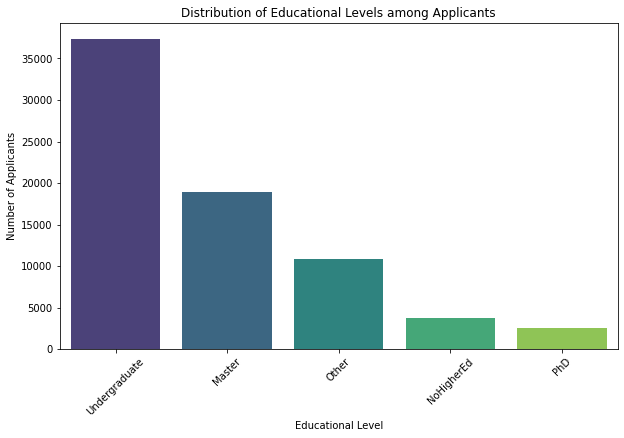

In [55]:

education_counts = df['EdLevel'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')
plt.title('Distribution of Educational Levels among Applicants')
plt.xlabel('Educational Level')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.show()

The barplot illustate that the majority of applicants have not yet graduated. 

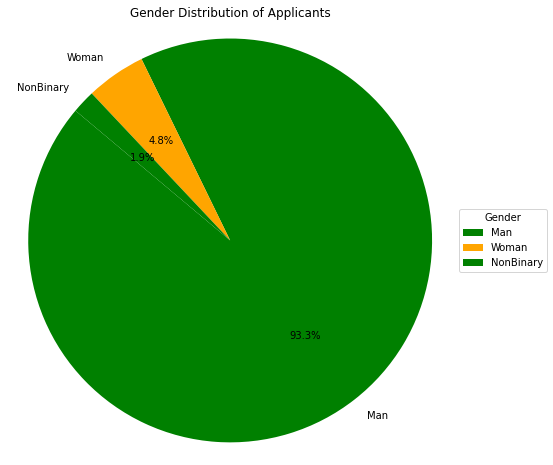

In [56]:
# Count occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'orange'])
plt.title('Gender Distribution of Applicants')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(gender_counts.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

 Above we see that a significantly larger portion of the pie chart represents male applicants compared to female applicants, we can conclude that more men had applied for the job compared to women.

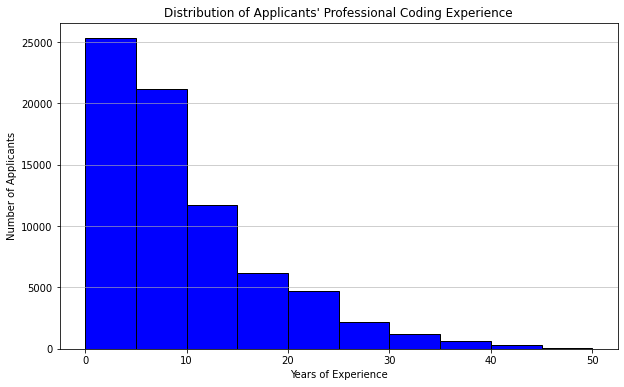

In [57]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(df['YearsCodePro'], bins=10, edgecolor='black', color='blue')
plt.title('Distribution of Applicants\' Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Applicants')
plt.grid(axis='y', alpha=0.75)
plt.show()

Python            71
                  63
Python;Git        54
C++;Python        49
C++               41
C++;Python;Git    36
Swift;Git         33
C++;Git           33
Delphi            32
R                 31
Name: HaveWorkedWith, dtype: int64


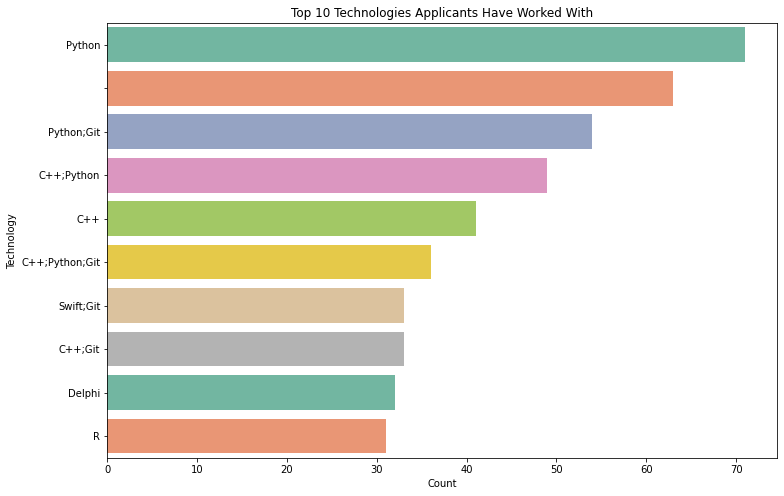

In [58]:
# For visualization, we'll need to split the 'HaveWorkedWith' entries and count them
# HaveWorkedWith' column has comma-separated values
df['HaveWorkedWith'] = df['HaveWorkedWith'].fillna('')  # Replace NaN with empty string
technologies = df['HaveWorkedWith'].str.split(',').explode().str.strip().value_counts()

# Display the top 10 most common technologies
print(technologies.head(10))

# Plot the top 10 technologies
plt.figure(figsize=(12, 8))
sns.barplot(x=technologies.head(10).values, y=technologies.head(10).index, palette='Set2')
plt.title('Top 10 Technologies Applicants Have Worked With')
plt.xlabel('Count')
plt.ylabel('Technology')
plt.show()

Checking duplicate rows in the dataset

In [9]:
df[df.duplicated(keep=False)]

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
3134,>35,No,Undergraduate,1,Man,No,Dev,39,27,Croatia,26124.0,SQL;Oracle,2,0
6652,>35,No,Master,0,Man,No,Dev,25,15,Italy,129718.0,Go;Java;JavaScript;Kotlin;Node.js;Rust;TypeScr...,16,1
6664,>35,No,Master,0,Man,No,Dev,25,15,Italy,129718.0,Go;Java;JavaScript;Kotlin;Node.js;Rust;TypeScr...,16,1
7280,<35,No,Undergraduate,1,Man,No,Dev,4,0,India,2653.0,Java;Python;Docker;Git;Kubernetes;Flask;Spring...,10,0
7329,<35,No,Undergraduate,1,Man,No,Dev,4,0,India,2653.0,Java;Python;Docker;Git;Kubernetes;Flask;Spring...,10,0
7783,>35,No,Undergraduate,1,Man,No,Dev,39,27,Croatia,26124.0,SQL;Oracle,2,0
45964,<35,No,Undergraduate,1,Man,No,Dev,17,10,Finland,44796.0,C#;Java;Python;Ansible;Docker;Unity 3D;Microso...,10,1
46025,<35,No,Undergraduate,1,Man,No,Dev,17,10,Finland,44796.0,C#;Java;Python;Ansible;Docker;Unity 3D;Microso...,10,1


### Predictions <a name="predictions"></a>

## ⚙️ Preprocessing

The step of preprocessing contains several activities to consider before we can start training the algorithm and produce a model that can predict our target variable.

Droping rows with null values together with duplicated rows

In [60]:
df.dropna(inplace=True)

In [61]:
df=df.drop_duplicates(keep='first', ignore_index=True)

In [62]:
df.shape

(73458, 14)

 # 🧬 Modelling
 
In this step only the train set is used to fit the model, which in this case uses KNeighborsClassifier algorithm for classification from Scikit-learn. https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification And after that the test set is used to calculate the model's accuracy, in other words how well it performs. Accuracy is a fraction where any value closer to 1 is considered better, and 1 itself (100% accurate) is usually impossible.

Assigning feature and target to variables

In [63]:
X = df.drop(['Employed'],axis=1)
y = df['Employed']

#### Using TF-IDF as a text tokenizer and vectorizer

The goal of using tf-idf is that it not only focuses on the frequency of words present in a text, but also provides the weight of the words. Sklearn.feature_extraction.text.TfidFVectorizer. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.t

In [64]:
tfidf_vectorizer = TfidfVectorizer(min_df=.01, use_idf =True, stop_words = 'english')
tf_X_vectorized = tfidf_vectorizer.fit_transform(df['HaveWorkedWith']).toarray()
tf_X_vectorized.shape

(73458, 100)

In [66]:
tfidf_vectorizer = TfidfVectorizer(min_df=.01, use_idf =True, stop_words = 'english')
tf_X_vectorized = tfidf_vectorizer.fit_transform(df['HaveWorkedWith'], ['Gender']).toarray()
tf_X_vectorized.shape

(73458, 100)

Make a dataframe of the vectorized data and view the result

In [15]:
X = pd.DataFrame(tf_X_vectorized)
X['HaveWorkedWith'] = df["HaveWorkedWith"].values
y = df['Employed']
X.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,HaveWorkedWith
6681,0.00000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Delphi;HTML/CSS;Java;Python;SQL;Flask;jQuery;H...
28645,0.00000,0.00000,0.0,0.000000,0.0,0.0,0.320215,0.000000,0.000000,0.0,...,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,C#;JavaScript;PowerShell;Python;SQL;Docker;Git...
3598,0.00000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.302961,0.000000,0.0,...,0.271742,0.00000,0.0,0.0,0.0,0.388429,0.0,0.0,0.0,Bash/Shell;HTML/CSS;JavaScript;PHP;SQL;TypeScr...
68415,0.00000,0.37952,0.0,0.396518,0.0,0.0,0.185359,0.000000,0.000000,0.0,...,0.152475,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScri...
49953,0.32144,0.00000,0.0,0.000000,0.0,0.0,0.201289,0.000000,0.421604,0.0,...,0.165579,0.32144,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,C#;HTML/CSS;JavaScript;Python;SQL;TypeScript;n...


## 🪓 Splitting into train/test

Splitting train and test data. Train data takes 80% and Test 20%

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 73458 observations, of which 58766 are now in the train set, and 14692 in the test set.


In [68]:
X_train = X_train.drop(['HaveWorkedWith'], axis=1)
X_HaveWorkedWith_text = X_test['HaveWorkedWith']
X_test = X_test.drop(['HaveWorkedWith'], axis=1)

## Running the model with KNeighborsClassifier

In [18]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8630696913958716


Using KNN with Tfid FVectorizer we are getting an accuracy of 86%. We can run our model on train and test data and compare their classification results and check if this performance is not an overfitting or underfitting.

We can see a difference of 5% on training and test data accuracy, so we can say that there is a slight overfitting. Next we will perform hyperparameters tuning and see if the performance will improve.

In [19]:
pred = model.predict(X_train.values)
report= classification_report(y_train,pred)
print(report)

pred = model.predict(X_test.values)
report= classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     27246
           1       0.93      0.91      0.92     31470

    accuracy                           0.91     58716
   macro avg       0.91      0.91      0.91     58716
weighted avg       0.91      0.91      0.91     58716

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      6759
           1       0.88      0.86      0.87      7920

    accuracy                           0.86     14679
   macro avg       0.86      0.86      0.86     14679
weighted avg       0.86      0.86      0.86     14679



In the above model we used default values of hyperparameters, for example n_neighbors (K) is 5 by default.

Let's search an optimal K value which will improve our model with less error rate. We are going to run the KNeighborsClassifier model with K values in range 1 to 10 and visualize in a plot to see which K will produce minimal error rate.

Minimum error:  0.13182096873083998 at K = 9


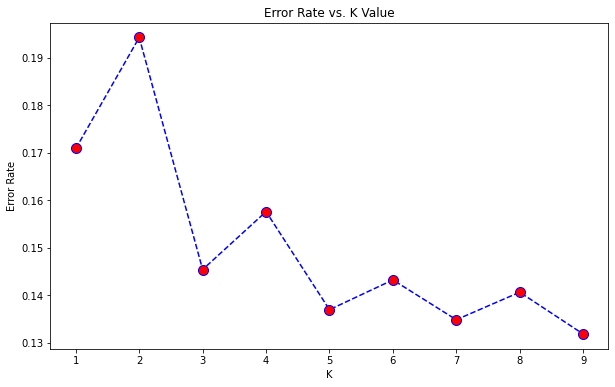

In [20]:
from sklearn import metrics
acc=[]
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    acc.append(metrics.accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

We find that at K=9 the model produces the lowest error rate of 0.13, and we are validating this by plotting the accuracy against K values and got the best accuracy of 86,8% when K=9

Maximum accuracy:  0.8681790312691601 at K = 9


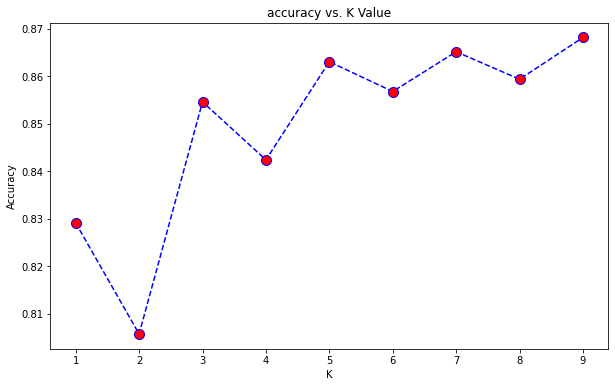

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at K =",acc.index(max(acc))+1)

Use the optimal K value of 9 and the model scored 86,8%

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8681790312691601


We can now see that the model's performance slight improved by 0.08%

In [23]:
pred = model.predict(X_train.values)
report= classification_report(y_train,pred)
print(report)

pred = model.predict(X_test.values)
report= classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     27246
           1       0.91      0.89      0.90     31470

    accuracy                           0.90     58716
   macro avg       0.90      0.90      0.90     58716
weighted avg       0.90      0.90      0.90     58716

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6759
           1       0.89      0.86      0.88      7920

    accuracy                           0.87     14679
   macro avg       0.87      0.87      0.87     14679
weighted avg       0.87      0.87      0.87     14679



## Running model with Random Forest Classifier

In this step only the train set is used to fit the model, which in this case uses a Random forest Classifier algorithm for classification named sklearn.ensemble. Ref: RandomForestClassifier. (n.d.-b). Scikit-learn. https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html And after that the test set is used to calculate the model's accuracy, in other words how well it performs. Accuracy is a fraction where any value closer to 1 is considered better, and 1 itself (100% accurate) is usually impossible.

In [38]:
X = pd.DataFrame(tf_X_vectorized)
X['HaveWorkedWith'] = df["HaveWorkedWith"].values
y = df['Employed']
X.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,HaveWorkedWith
35651,0.0,0.000000,0.25141,0.0,0.000000,0.000000,0.000000,0.161112,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,Bash/Shell;Clojure;HTML/CSS;JavaScript;LISP;Ru...
43475,0.0,0.000000,0.00000,0.0,0.282275,0.117758,0.153831,0.141078,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.301172,0.0,0.0,0.0,0.164063,Assembly;Bash/Shell;C;C++;HTML/CSS;JavaScript;...
70575,0.0,0.000000,0.00000,0.0,0.000000,0.186561,0.000000,0.000000,0.0,0.0,...,0.200475,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,JavaScript;TypeScript;Docker;Homebrew;npm;Expr...
27702,0.0,0.000000,0.00000,0.0,0.000000,0.386320,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,Python;Docker;Git;Flask;AWS
71584,0.0,0.211507,0.00000,0.0,0.000000,0.158154,0.000000,0.000000,0.0,0.0,...,0.169949,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,HTML/CSS;JavaScript;Ruby;TypeScript;npm;Angula...


In [32]:

## Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 73395 observations, of which 58716 are now in the train set, and 14679 in the test set.


In [33]:
X_train = X_train.drop(['HaveWorkedWith'], axis=1)
X_HaveWorkedWith_text = X_test['HaveWorkedWith']
X_test = X_test.drop(['HaveWorkedWith'], axis=1)

In [34]:

classifier=RandomForestClassifier().fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred)

0.963962122760406

In [36]:
confusion_matrix(y_test,y_pred)

array([[6553,  217],
       [ 312, 7597]], dtype=int64)

## Evaluation

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6770
           1       0.97      0.96      0.97      7909

    accuracy                           0.96     14679
   macro avg       0.96      0.96      0.96     14679
weighted avg       0.96      0.96      0.96     14679



Looking at the accuracy score, we can see that this Random Forest model performs very well compared to the KNN model, achieving a 96% accuracy. The reason for this performance could be that Random Forests reduce overfitting by achieving a balance between bias and variance. KNN can overfit with a small number of neighbors or underfit with a large number.

